## 1. 동적으로 html을 만드는 경우 : 전체말고 부분만 바꾸는 경우

# 네이버_쇼핑_크롤링(인프런 강의)

In [2]:
# 셀레니움 설치
!pip install selenium

In [11]:
# 네이버 열기
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import csv

browser = webdriver.Chrome('C:\chromedriver.exe') # 브라우저 생성
browser.get('https://www.naver.com') # 웹사이트 열기
browser.implicitly_wait(10) # 로딩이 끝날떄까지 10초까지는 기다려줌 

# 쇼핑 메뉴 클릭하기
# <a href="https://shopping.naver.com/" class="nav shop" data-clk="svc.shopping"><span class="blind">쇼핑</span></a>
browser.find_element_by_css_selector('a.nav.shop').click()
time.sleep(2)

browser.find_element_by_css_selector('a.nav.shop').click()
time.sleep(2)

# 검색창 클릭
search = browser.find_element_by_css_selector('input.co_srh_input._input')
search.click()

# 검색어 입력
search.send_keys('다꾸스티커')
search.send_keys(Keys.ENTER)

# 스크롤 전 높이
before_h = browser.execute_script("return window.scrollY")

# 무한 스크롤
while True:
    # 맨 아래로 스크롤을 내린다.
    browser.find_element_by_css_selector("body").send_keys(Keys.END)
    
    # 스크롤 사이 페이지 로딩 시간
    time.sleep(2)
    
    # 스크롤 후 높이
    after_h = browser.execute_script("return window.scrollY")
    
    if after_h == before_h:
        break;
    before_h = after_h
    
# 파일생성
f = open(r"C:\Users\user\jupyter\data.csv", 'w', encoding='cp949', newline='') # 쓰기모드
csvWriter = csv.writer(f)
    
# 상품정보 div
items = browser.find_elements_by_css_selector(".basicList_info_area__17Xyo")

for item in items:
    name = item.find_element_by_css_selector(".basicList_title__3P9Q7").text
    
    try:
        price = item.find_element_by_css_selector(".price_num__2WUXn").text
    except:
        price = "판매중단"
    link = item.find_element_by_css_selector(".basicList_title__3P9Q7 > a").get_attribute('href')
    print(name,price,link)
    # 데이터 쓰기
    csvWriter.writerow([name, price, link])

# 파일 닫기
f.close()

C:\Users\user\AppData\Local\Temp/ipykernel_8520/2415622270.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:\chromedriver.exe') # 브라우저 생성
C:\Users\user\AppData\Local\Temp/ipykernel_8520/2415622270.py:13: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector('a.nav.shop').click()
C:\Users\user\AppData\Local\Temp/ipykernel_8520/2415622270.py:17: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  search = browser.find_element_by_css_selector('input.co_srh_input._input')
C:\Users\user\AppData\Local\Temp/ipykernel_8520/2415622270.py:30: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector("

다꾸 폴꾸 씰스티커 홀로그램 나비 씰 다이어리꾸미기 1,200원 https://adcr.naver.com/adcr?x=hV4pFQCCFTHc/Kd+xWd/fP///w==kunUp1Xi59wsM7XcfKVGFO7YDLFsfSzh5UHz7VKB67qCNuXxe1wDzvV3Nn5VxTY80Yjknr5eFTrSwmhn1Df1ueoPTL/1htJtGfb64614TLqjK3H+OKMcisYFLsiPJlEeVMsQMAiRLSkMzBC6EtHVIm1TYRmb/p42uZgeuhGOJwouWS/+iZdmHgzQ+bB5IDArboJcpsXKI7kjm4EyiapP96+q+CPh4pmoam0kAvthcFT+JX+WyZoddi0krvpDP696xKiXZvGD9MjrtdFVocLPA9jmsTQYkLgvtCEeyg9pvpeAJafzH5RNeGZjKp5/G/EMLQtnGZ5jzfpFwvNKZpwgk1X3qpj95yuqdnBB6v+fOKkxmBmJco3jLgyHtfDc6INwrZ+pHlgcF23VDXJb5cKNEBM2ylj3fYgV+LXS0/z87kWeLX8J1Znrg7rn3Icdl9lLdiWxPnrFOAlEu3ByqAFhFDwUxw6kpySeiJlmyTLFwbFpTuQLfH08qMoEuwM2Kq/brHJc52v4AJYKid+b5VMPhNGvh1Qn0fXTkm4vrRGqmaUYQ98HRmB05uKRfzA+15QYxmNk7ZxmKLWRllL6gJrht1TKG6s/SHw83E/pRDV1Iuz1yHnND6nI/h2Qt8BZKYMKlwUIwyu0nzHkJEy8mOqNOj8OTEwyWQ4z8Bga46jAx75XunMWcRnqMPesRNNaxl+7jX4hq6Kdx55eFSwjgACC++ZAObfh+DRQNuBPtP/MhHRSP4j0ReJ+W9xmq0cZsEyzcomV7V0JitEKrN5wdFpN5SU07JY5YQBbQ4dRC1TvN77txKuOQ9U0+CZj1zkZssp5gnTOduByqAajva7QZrpVB02Up6WL+YxWDOyYt7GqgRoeWM3o74ibIix5KHgnrqisYRAAo7tcDr

6배 인스 랜덤박스 인쇄소 랜박 50세트 꾸미기 스티커 떡메모지 랩핑지 다꾸[허니마켓] 17,000원 https://cr.shopping.naver.com/adcr.nhn?x=42%2BlLmJCea9CM91gCLmrjf%2F%2F%2Fw%3D%3DsZ%2BalBs5%2BIN7QiV5kzYA%2FqdUNgiIvQMVu2dSXMC609wUbiNNDppUImZLewO8pMvl5l%2B8aKnPXVqdugOcZZwtIPQrTnHaM%2BEG62GJyq61RqIa%2BFAedJ9if9Drxr6JKlErI1XJkxJYSoMg0qDZYACHDfITQFhMNCQrG%2ByyVwSaillfdNec4Cvj%2Ba%2BGQsrA34g6VrSIeTBgEXSp%2FJqtRuw3Bxt7q%2Fqw75AskPNikgH64O%2FxYO4Am6plsaXHSO650j1yFP2tfKoQ0NQPyiad34AQ6K9%2FdVvwtcOUlbNrGLU3RUnq10luftaK4lR9JQ6Eku547VrwF8l6X%2BjZ8ux5E2nHYO0cZiGyIUTEWDOaFHgNRTAfj4raXWPpjSwqKseGWLIMdX4ZGSJ%2BxiHvrB9ufFj17JyL536bIDcFX5exR7PFusc0QTJk8xopX2O649z2PpuFh%2BZSRf6%2FmyvvmzTxQA8DvmffVs9De1D0zuqx%2FnI40UErdSUjoRyEWvE2I7u815xuVqrAplyLaEVnsmk%2Fs0Quxw9VqWPm3l2CYlHLU5pIGC%2Fv%2BO6dlDBmqreCupbomegoSX01R8aVFZKa1I5W%2F%2FFTEvbk9yx2LE4ozzid%2FD5TsgrrgbvFL3pS3XdMJfsgv2BEPYdPPm67Y9V%2BbIPYi88icTq8vpa0vnihTfsx9Dqcx78PLVWGr8fvvH1mWvUgXPK6j&nvMid=82474305792&catId=50007608
다이어리 데코스티커 일상 리무버블 씰스티커 귀여운 캐릭터 다꾸 스꾸 폰꾸 에어팟 꾸미기 1,050원 https://cr.shoppi

컨페티 스티커 탑꾸 씰 폴꾸 다이어리꾸미기 다꾸 랜덤 박스팩 노트북 알파벳 인스 리무버블 5,500원 https://cr.shopping.naver.com/adcr.nhn?x=tCMIswdGLMpL6qEprIWf%2Bv%2F%2F%2Fw%3D%3Ds86JMDvyj2x3Un93vUC5wupHAY%2ByrWf%2BiDdoPo8gIilMbiNNDppUImZLewO8pMvl5tyyk4Gt66fZJVjYn2swXxvq52FgQhEMQukifcqOu68q%2BFAedJ9if9Drxr6JKlErI1XJkxJYSoMg0qDZYACHDfITQFhMNCQrG%2ByyVwSaillfdNec4Cvj%2Ba%2BGQsrA34g6VRVONFTQ8ZQcTnq%2FPOW3vxUA15GOhpHQjFTc3TaY6Po5YO4Am6plsaXHSO650j1yFP2tfKoQ0NQPyiad34AQ6K9%2FdVvwtcOUlbNrGLU3RUnqOPwruIjoIFv0Y7UAnzcL1SfU9ScA7jXPiiIgqYpKpT8v7sGgCZRdAfHzzLBazutwqbKMzYUdPl8ecXNxPxHbvnBZ7mu5gMI8jlg47JpNLXdgXewq9WLsvencfLZWzlL3%2B5iWFx8TKHMkQDmQCIfEeF44V7IcbjIRT3NEzg%2F1HKqKtOlzltYqXx9SrVjlecptaxRlLOwgE3R682BTW6lPpJPqHBNFrbKm6YFTpfWEVEjVeQTEBLoKVBFrjUS7S%2BlVy5KhEDjnUGmDjgNQ7Anq%2BU46HfTL3Crk8tEZNn2NgjPQlF29xIP16X6PqUuV1IMuS3bvSp9YQ86Xs5zQD55LIL9ZCteljI%2FCBNVTon4yEyaaGWqHmPWnrjYTN%2FX4EGYMRW0aHreg7NvlG0eTBCYWsBq7h9PA5SrIXrcWPClBGWw%3D%3D&nvMid=83031290872&catId=50007608
마이 다꾸 스티커북 스티커 정리 보관 파일 보관함 7,800원 https://cr.shopping.naver.com/ad

[인물도감] 친구 특이한선물 리무버블 띠부띠부씰 연예인 얼굴 스티커 제작 주문 9,500원 https://cr.shopping.naver.com/adcr.nhn?x=CZLymAakBDrAUHtHI5VukP%2F%2F%2Fw%3D%3Ds1pDBaycpOi3Kl%2BxUvQ27QH9ym5ljo%2BwcWWesDEG12XOOJthpz54TRNA%2B9tMLkm4XzmfnkrhnR%2FiW2r%2BQpb2WEZcP0IAf8QjrTybRWhREvODNiub3DVPwLb7dbI6tVoyt1dXum1ipChSj%2FffbZgZFL6xUTfizNciQK%2B%2FJMo5kHrlWrxaEGYqB0DQc4FejQVgON%2FLrH1QI1QAAeivPf3I2WP2LYEmu%2BtvxoGq8bpPWhUetELBAVFtjzpOBMSWWLheygGwmPNX%2Fe%2BXkuZ30duRQYj%2FN1gL%2FBgCKENDMCz1nm%2F27ymTG4MLjs0%2FAIJ2LmNT%2F9xK50Q%2BTDKZIF9oDtcUgRHVFvJw0rBoU1z9pPl%2BtXPzN5c9rmClmdFGjnOs4UcwFzfNVo1KcSVSazeZg7M%2BAaeMbiNSmxKGOX63AOoaFt1H8DnsTZIc2GtAnmwIji6nJPGSP9hUTfAvTeqYaA0zQ9CKjE4Z04Xj1FthoBNFNqZxYPe%2Fow8kDzEDfy92qM2VMt1%2BeXXYNAEYcW0O9H7IjnRJZt3sZ6nK6gkHY2WGB%2Fn6y6XjqdnvOWTGhfldzTSwzJm935xnmHO6nhDgSPHPIT5AJTisD2oQhMmHfRPpWpo6E6K5kaeZuSqHd%2FTkgrHcULa9VJImNjtH495MUt9IERofyYx%2FMJIqiO04Xsel4gm4dHI8FZtQVGFZJxOyBDKc%2B&nvMid=83493601277&catId=50007608
6mm 알파벳 스티커 [대문자+소문자+숫자] 10색 폴꾸 다꾸 탑꾸 알스 수입스티커 900원 https://cr.shopping.naver.c

핸드폰스티커 스꾸 다꾸 스티커밤 태블릿 다이어리 꾸미기 2,500원 https://cr.shopping.naver.com/adcr.nhn?x=Snq%2BdpGhrrn2NEQuTEjsoP%2F%2F%2Fw%3D%3DsJ02z0Gv6nrbXoSb42MP0t1t%2BytaJbgn5XH%2BbeFrceBSOJthpz54TRNA%2B9tMLkm4XEl2%2B%2B67veMp%2FEBP2SpQPTobqqQh8mYr2Due64psS3g3Niub3DVPwLb7dbI6tVoyt1dXum1ipChSj%2FffbZgZFL6xUTfizNciQK%2B%2FJMo5kHrlWrxaEGYqB0DQc4FejQVgOKHd7h5UXvxoKMtLmNGDTZXv20zPxQxESfl7yDtayqPCtELBAVFtjzpOBMSWWLheygGwmPNX%2Fe%2BXkuZ30duRQYj%2FN1gL%2FBgCKENDMCz1nm%2F2XFkdK9ot61W2%2Fps1MH9hrewYOuROlmD6bJJ1oUQFsbww2DafQmlpgNRG9nPetzb9%2Ffk4oNneoVBufOb4SfHg9jB5%2BwQwTWqlzZqCmwHkzL5BtVcUO0ubbNaI0eHUuZdq08iN7mzkjFu9qz199DgjPe4rKl0eLt92kFoKA9WLeLQBj8n0toaNPd9GKvJAtiU3AgXnu10YOpBsdSzNv11H2%2Ba6rlYLLE01QMwLpz3oe3C%2FQIZ9Soee6fxlndKLUNzWr7VAb36ErED7xDOmVlGU6YPXGtRV4g%2B9a1yrWqsymTBN0ho2cXd0laoRUt9dZc9x7VGcLaw940sQo6ewctKg4DhLBwu%2FFQS5xWYf5w6G3jQ%3D%3D&nvMid=82320875478&catId=50007608
리무버 홀로그램 씰스티커 트윙클 컨페티스티커 폴꾸 다꾸 스꾸 탑꾸 리무버블 다이어리꾸미기 1,680원 https://cr.shopping.naver.com/adcr.nhn?x=AczYuBaxZggeW6EmvWit%2F%2F%2F%2F%2Fw%3

In [77]:
# 네이버 열기
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import csv

browser = webdriver.Chrome('C:\chromedriver.exe') # 브라우저 생성
browser.get('https://www.naver.com') # 웹사이트 열기
browser.implicitly_wait(10) # 로딩이 끝날떄까지 10초까지는 기다려줌 

# 쇼핑 메뉴 클릭하기
# <a href="https://shopping.naver.com/" class="nav shop" data-clk="svc.shopping"><span class="blind">쇼핑</span></a>
browser.find_element_by_css_selector('a.nav.shop').click()
time.sleep(2)

# 몰 전체보기 누르기
browser.find_element_by_css_selector('a.co_mall').click()
time.sleep(2)

# 스마트 스토어 누르기
browser.find_element_by_css_selector('circle').click()
time.sleep(2)

# 검색창 클릭
search = browser.find_element_by_css_selector('input.mallFilter_input_search__2WrTv')
search.click()

# 검색어 입력
search.send_keys('다꾸')
search.send_keys(Keys.ENTER)
# 스크롤 전 높이
before_h = browser.execute_script("return window.scrollY")

# 무한 스크롤
while True:
    # 맨 아래로 스크롤을 내린다.
    browser.find_element_by_css_selector("body").send_keys(Keys.END)
    
    # 스크롤 사이 페이지 로딩 시간
    time.sleep(2)
    
    # 스크롤 후 높이
    after_h = browser.execute_script("return window.scrollY")
    
    if after_h == before_h:
        break;
    before_h = after_h
    
#---------------------------------------------------------------------------------------------#
# 파일생성
f = open(r"C:\Users\user\jupyter\data2.csv", 'w', encoding='cp949', newline='') # 쓰기모드
f.write('상점이름, 구독자수, 파워유무, 상품개수\n')

csvWriter = csv.writer(f)
    
# 상품정보 div 큰 박스
items = browser.find_elements_by_css_selector(".mallListItem_main_info__3H9xh")
for item in items:
    
    name = item.find_element_by_css_selector(".mallListItem_title__3sJnY").text # 타이틀(쇼핑몰 이름) strong.mallListItem_title__3sJnY
    # 중간에 오류가 있어서 크롤링이 안될 경우 rty except를 사용한다.
    try:
        price = item.find_elements_by_css_selector(".mallListItem_cell__3BvGd")[0].text # 스토어찜 수
        price1 = item.find_elements_by_css_selector(".mallListItem_cell__3BvGd")[3].text # 스토어찜 수
    except:
        price = "판매중단"
    # link = item.find_elements_by_css_selector(".mallListItem_item_mall__3yVIl > a")[0].get_attribute('href')
    
    # count = item.find_element_by_css_selector(".mallListItem_etc__3Dpg_ > span")[2].text # 상품개수

    kind = item.find_elements_by_css_selector(".mallListItem_etc__3Dpg_ > span")[1].text # 생활a

    
   
    print(name, kind, price, price1)
    # 데이터 쓰기
    csvWriter.writerow([name, kind, price, price1])

# 파일 닫기
f.close()

C:\Users\user\AppData\Local\Temp/ipykernel_7968/2745876935.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:\chromedriver.exe') # 브라우저 생성
C:\Users\user\AppData\Local\Temp/ipykernel_7968/2745876935.py:13: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector('a.nav.shop').click()
C:\Users\user\AppData\Local\Temp/ipykernel_7968/2745876935.py:17: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector('a.co_mall').click()
C:\Users\user\AppData\Local\Temp/ipykernel_7968/2745876935.py:21: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector('circle').click()


일리상점 스토어찜 9,455 빅파워 상품개수 5,242
모챠모챠 스토어찜 11,623 빅파워 상품개수 1,655
핑크무라 스토어찜 7,958 파워 상품개수 1,220
봄나비상점 스토어찜 1,165 파워 상품개수 988
두근두근문구점 스토어찜 19,728 빅파워 상품개수 9,035
허니 마켓 스토어찜 1,280 파워 상품개수 794
cherish-mg 스토어찜 3,383 파워 상품개수 852
워리문구점 스토어찜 480 파워 상품개수 571
달페이퍼 스토어찜 7,804 빅파워 상품개수 5,919
체리벨 스토어찜 25,941 빅파워 상품개수 932
다꾸랭킹 스토어찜 5,041 파워 상품개수 1,746
로맨틱핑크 스토어찜 1,556 파워 상품개수 3,787
루카랩 스토어찜 34,988 빅파워 상품개수 484
줄리엣의 편지 스토어찜 7,079 빅파워 상품개수 429
멜리멜로 melimelo 스토어찜 5,195 빅파워 상품개수 2,276
뽀뽀상점 스토어찜 7,646 파워 상품개수 517
AROJIN 스토어찜 13,570 파워 상품개수 108
DANNISHOP 스토어찜 7,623 빅파워 상품개수 39


IndexError: list index out of range

In [64]:
# 네이버 열기
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import csv

browser = webdriver.Chrome('C:\chromedriver.exe') # 브라우저 생성
browser.get('https://www.naver.com') # 웹사이트 열기
browser.implicitly_wait(10) # 로딩이 끝날떄까지 10초까지는 기다려줌 

# 쇼핑 메뉴 클릭하기
# <a href="https://shopping.naver.com/" class="nav shop" data-clk="svc.shopping"><span class="blind">쇼핑</span></a>
browser.find_element_by_css_selector('a.nav.shop').click()
time.sleep(2)

# 몰 전체보기 누르기
browser.find_element_by_css_selector('a.co_mall').click()
time.sleep(2)

# 스마트 스토어 누르기
browser.find_element_by_css_selector('circle').click()
time.sleep(2)

# 검색창 클릭
search = browser.find_element_by_css_selector('input.mallFilter_input_search__2WrTv')
search.click()

# 검색어 입력
search.send_keys('다꾸')
search.send_keys(Keys.ENTER)

# 무한 스크롤
while True:
    # 맨 아래로 스크롤을 내린다.
    browser.find_element_by_css_selector("body").send_keys(Keys.END)
    
    # 스크롤 사이 페이지 로딩 시간
    time.sleep(2)
    
    # 스크롤 후 높이
    after_h = browser.execute_script("return window.scrollY")
    
    if after_h == before_h:
        break;
    before_h = after_h
    
#---------------------------------------------------------------------------------------------#

response = browser.page_source
#soup
soup = BeautifulSoup(response, "html.parser")
link = soup.select('a.url')

print(link)

C:\Users\user\AppData\Local\Temp/ipykernel_8520/3375594740.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:\chromedriver.exe') # 브라우저 생성
C:\Users\user\AppData\Local\Temp/ipykernel_8520/3375594740.py:14: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector('a.nav.shop').click()
C:\Users\user\AppData\Local\Temp/ipykernel_8520/3375594740.py:18: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector('a.co_mall').click()
C:\Users\user\AppData\Local\Temp/ipykernel_8520/3375594740.py:22: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  browser.find_element_by_css_selector('circle').click()


TypeError: object of type 'WebDriver' has no len()

In [71]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import csv

browser = webdriver.Chrome('C:\chromedriver.exe') # 브라우저 생성


browser.get('https://www.naver.com') # 웹사이트 열기
html = requests.brwser
browser.implicitly_wait(10) # 로딩이 끝날떄까지 10초까지는 기다려줌 

bs_html = BeautifulSoup(browser,"html.parser")

naver_logo = bs_html.find("span",{"class":"naver_logo"})

print(naver_logo)
print(naver_logo.text)


C:\Users\user\AppData\Local\Temp/ipykernel_8520/2580008348.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:\chromedriver.exe') # 브라우저 생성


AttributeError: module 'requests' has no attribute 'brwser'

# 데이터 로드

In [1]:
# 라이브러리 로드하기
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [2]:
# 한글폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

In [3]:
# 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp/ipykernel_12376/1336414531.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [4]:
# 파일 로드
df = pd.read_csv("Data/data1.csv",encoding="cp949")
df.head()

,상점이름,구독수,파워,개수
0,일리상점,"스토어찜 9,455",빅파워,"상품개수 5,242"
1,모챠모챠,"스토어찜 11,623",빅파워,"상품개수 1,655"
2,핑크무라,"스토어찜 7,958",파워,"상품개수 1,220"
3,봄나비상점,"스토어찜 1,165",파워,상품개수 988
4,두근두근문구점,"스토어찜 19,728",빅파워,"상품개수 9,035"


In [30]:
df.shape

(242, 4)

In [5]:
# 컬럼이름 바꾸기
df.columns=["상점이름","구독수","파워유무","상품개수"]
df.head()

,상점이름,구독수,파워유무,상품개수
0,일리상점,"스토어찜 9,455",빅파워,"상품개수 5,242"
1,모챠모챠,"스토어찜 11,623",빅파워,"상품개수 1,655"
2,핑크무라,"스토어찜 7,958",파워,"상품개수 1,220"
3,봄나비상점,"스토어찜 1,165",파워,상품개수 988
4,두근두근문구점,"스토어찜 19,728",빅파워,"상품개수 9,035"


In [6]:
df = pd.DataFrame(df)
df.shape

(242, 4)

In [7]:
df_sub_count = df[["상점이름","구독수"]]
df_sub_count

,상점이름,구독수
0,일리상점,"스토어찜 9,455"
1,모챠모챠,"스토어찜 11,623"
2,핑크무라,"스토어찜 7,958"
3,봄나비상점,"스토어찜 1,165"
4,두근두근문구점,"스토어찜 19,728"
...,...,...
237,쩡아마켓,생활/건강
238,이씨EC,상품개수 1
239,아재헤이즐 문방구,생활/건강
240,땡땡 상점,생활/건강


In [8]:
# 스토어찜이 있는 스토어만 모아서 보기
df_sub = df_sub_count.loc[df["구독수"].str.contains("스토어")].copy()
df_sub.head()

,상점이름,구독수
0,일리상점,"스토어찜 9,455"
1,모챠모챠,"스토어찜 11,623"
2,핑크무라,"스토어찜 7,958"
3,봄나비상점,"스토어찜 1,165"
4,두근두근문구점,"스토어찜 19,728"


In [9]:
# 스토어찜 없애고 숫자만 남기기
df_sub[["구독수"]]

,구독수
0,"스토어찜 9,455"
1,"스토어찜 11,623"
2,"스토어찜 7,958"
3,"스토어찜 1,165"
4,"스토어찜 19,728"
5,"스토어찜 1,280"
6,"스토어찜 3,383"
7,스토어찜 480
8,"스토어찜 7,804"
9,"스토어찜 25,941"


In [10]:
def parse_year(data):
    year = data.split("찜")[-1] # 뒤에 있는 숫자 가져오기
    year = year.replace(' ', '') # 공백 없애기
    year = year.replace(',', '') # 컴마 없애기
    # int(year) # 숫자로 변경 

    year = int(year)
    return year
y = parse_year(data)
print(type(y))
y

NameError: name 'data' is not defined

In [11]:
# 구독자수 컬럼 새로 만들어서 숫자로 변경해주기
df_sub["구독자수"] = df_sub["구독수"].apply(parse_year)
df_sub

,상점이름,구독수,구독자수
0,일리상점,"스토어찜 9,455",9455
1,모챠모챠,"스토어찜 11,623",11623
2,핑크무라,"스토어찜 7,958",7958
3,봄나비상점,"스토어찜 1,165",1165
4,두근두근문구점,"스토어찜 19,728",19728
5,허니 마켓,"스토어찜 1,280",1280
6,cherish-mg,"스토어찜 3,383",3383
7,워리문구점,스토어찜 480,480
8,달페이퍼,"스토어찜 7,804",7804
9,체리벨,"스토어찜 25,941",25941


In [12]:
# 구독수 컬럼 삭제
df_sub = df_sub.drop("구독수",axis=1)
df_sub.head()

,상점이름,구독자수
0,일리상점,9455
1,모챠모챠,11623
2,핑크무라,7958
3,봄나비상점,1165
4,두근두근문구점,19728


In [27]:
# 242개에서 27개만 살아남았다는것을 알 수 있다.
df_sub.shape

(27, 2)

<AxesSubplot:xlabel='상점이름'>

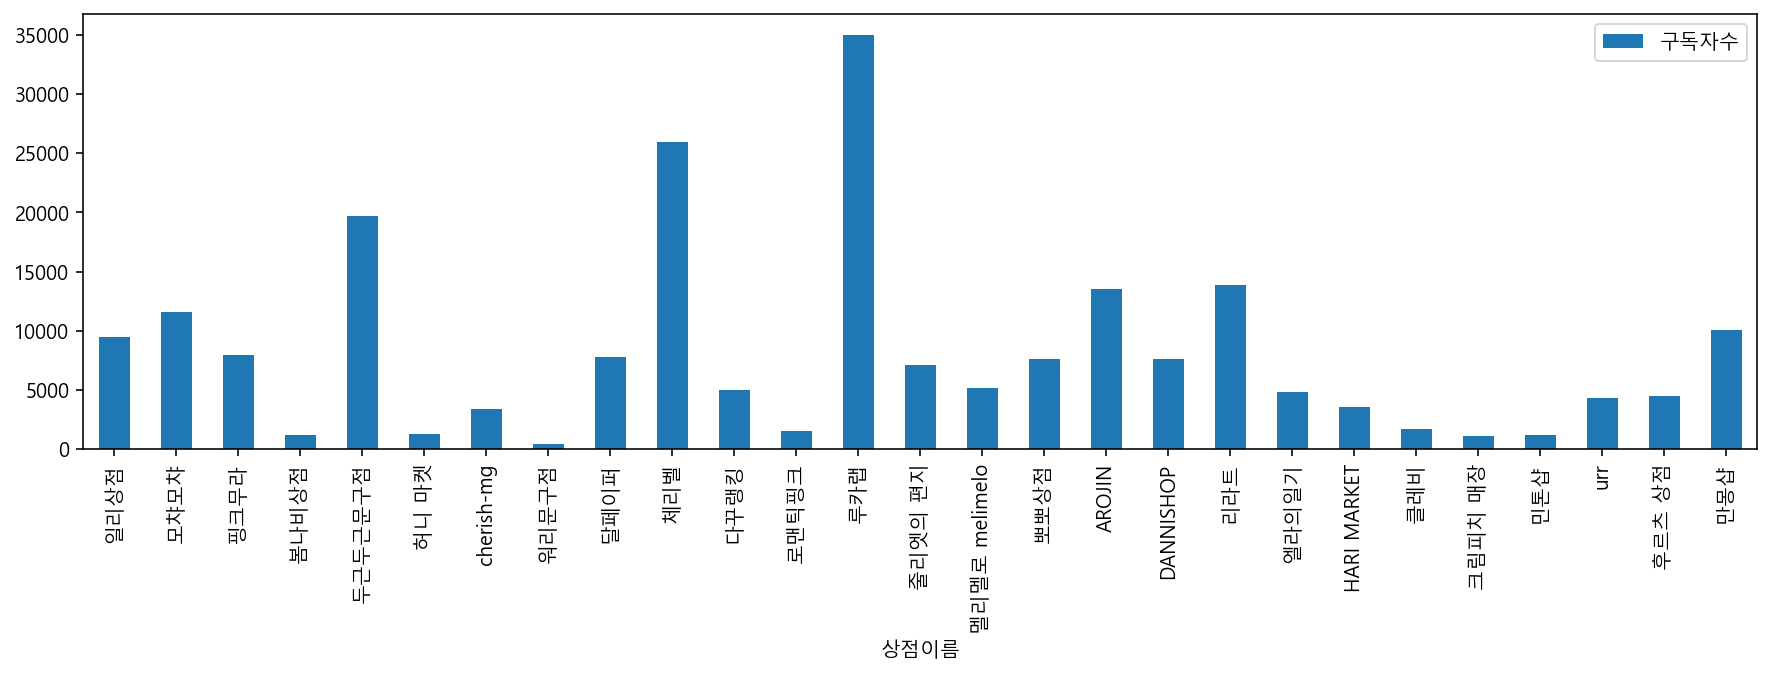

In [13]:
df_sub.plot.bar(x = "상점이름",figsize=(15,4))


In [15]:
df

,상점이름,구독수,파워유무,상품개수
0,일리상점,"스토어찜 9,455",빅파워,"상품개수 5,242"
1,모챠모챠,"스토어찜 11,623",빅파워,"상품개수 1,655"
2,핑크무라,"스토어찜 7,958",파워,"상품개수 1,220"
3,봄나비상점,"스토어찜 1,165",파워,상품개수 988
4,두근두근문구점,"스토어찜 19,728",빅파워,"상품개수 9,035"
...,...,...,...,...
237,쩡아마켓,생활/건강,판매중단,상품개수 1
238,이씨EC,상품개수 1,판매중단,상품개수 1
239,아재헤이즐 문방구,생활/건강,판매중단,상품개수 1
240,땡땡 상점,생활/건강,판매중단,상품개수 1


In [17]:
df_power_count = df[["상점이름","구독수","파워유무"]]
df_power_count

,상점이름,구독수,파워유무
0,일리상점,"스토어찜 9,455",빅파워
1,모챠모챠,"스토어찜 11,623",빅파워
2,핑크무라,"스토어찜 7,958",파워
3,봄나비상점,"스토어찜 1,165",파워
4,두근두근문구점,"스토어찜 19,728",빅파워
...,...,...,...
237,쩡아마켓,생활/건강,판매중단
238,이씨EC,상품개수 1,판매중단
239,아재헤이즐 문방구,생활/건강,판매중단
240,땡땡 상점,생활/건강,판매중단


In [18]:
# 파워나 빅파워가 들어간 상점

df_power = df_power_count.loc[df["파워유무"].str.contains("파워")].copy()
df_power.head()

,상점이름,구독수,파워유무
0,일리상점,"스토어찜 9,455",빅파워
1,모챠모챠,"스토어찜 11,623",빅파워
2,핑크무라,"스토어찜 7,958",파워
3,봄나비상점,"스토어찜 1,165",파워
4,두근두근문구점,"스토어찜 19,728",빅파워


In [20]:
# 구독자 수 숫자로 변경
df_power["구독자수"] = df_power["구독수"].apply(parse_year)
df_power

,상점이름,구독수,파워유무,구독자수
0,일리상점,"스토어찜 9,455",빅파워,9455
1,모챠모챠,"스토어찜 11,623",빅파워,11623
2,핑크무라,"스토어찜 7,958",파워,7958
3,봄나비상점,"스토어찜 1,165",파워,1165
4,두근두근문구점,"스토어찜 19,728",빅파워,19728
5,허니 마켓,"스토어찜 1,280",파워,1280
6,cherish-mg,"스토어찜 3,383",파워,3383
7,워리문구점,스토어찜 480,파워,480
8,달페이퍼,"스토어찜 7,804",빅파워,7804
9,체리벨,"스토어찜 25,941",빅파워,25941


In [21]:
# 구독수 컬럼 삭제
df_power = df_power.drop("구독수",axis=1)
df_power.head()

,상점이름,파워유무,구독자수
0,일리상점,빅파워,9455
1,모챠모챠,빅파워,11623
2,핑크무라,파워,7958
3,봄나비상점,파워,1165
4,두근두근문구점,빅파워,19728


<AxesSubplot:xlabel='상점이름'>

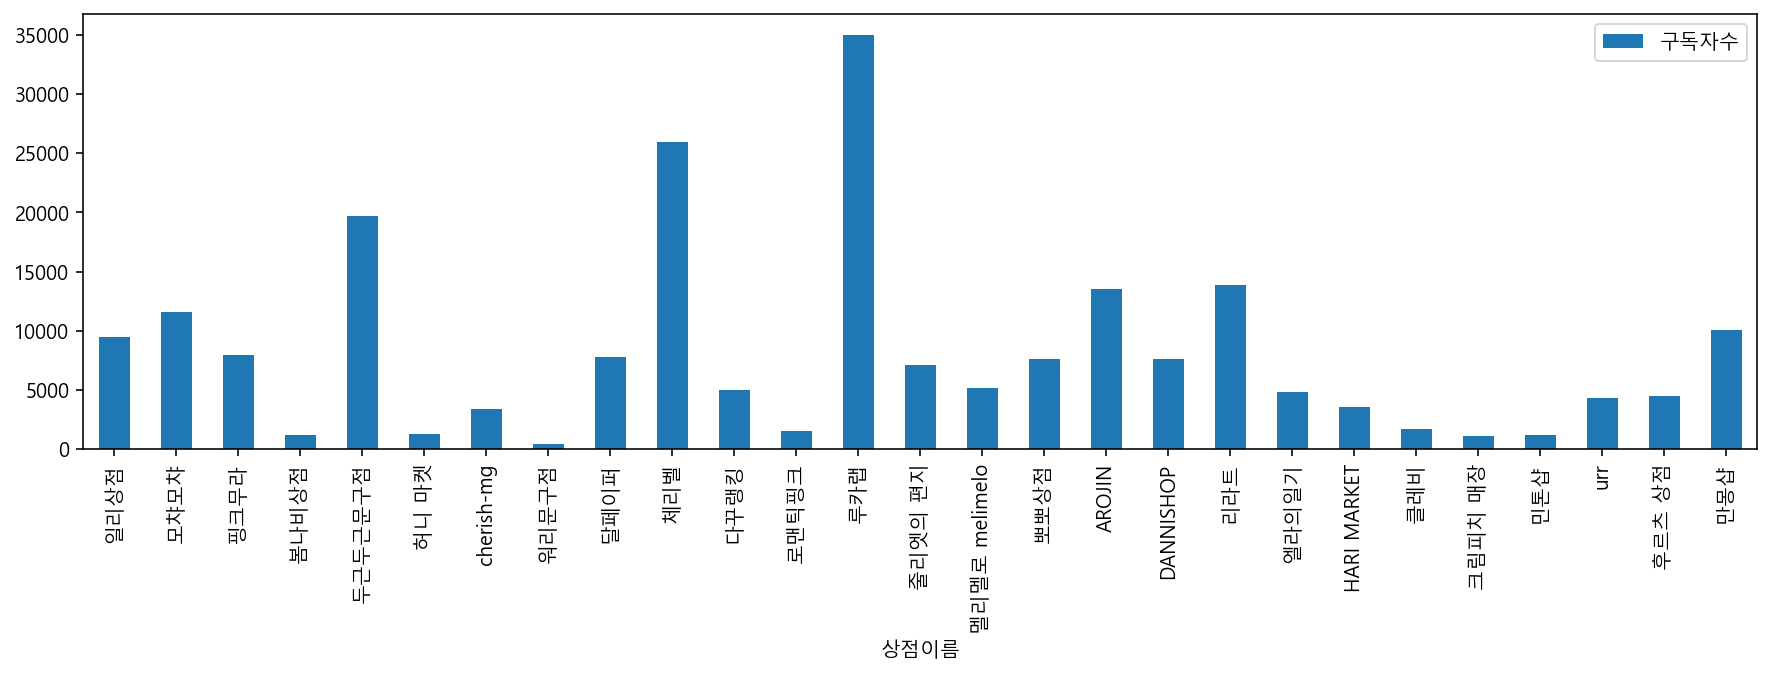

In [22]:
# 파워나 빅파워가 붙은 상점들만 모아서 스토어찜 개수 보기
df_power.plot.bar(x = "상점이름",figsize=(15,4))

In [29]:
df_power.shape

(27, 3)